## Final Project Submission

Please fill out:
* Student name: Stephen Turk 
* Student pace: part time
* Scheduled project review date/time: 8/13/20 at 430 MST/ 630EST
* Instructor name: James Irving
* Blog post URL:


In [21]:
jupyter labextension install @jupyterlab/toc

SyntaxError: invalid syntax (<ipython-input-21-2c1e2776b58d>, line 1)

In [1]:
# Your code here - remember to use markdown cells for comments as well!

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
data.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [6]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [7]:
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

After loading libraries and data, time to do some quick data exploration before cleaning

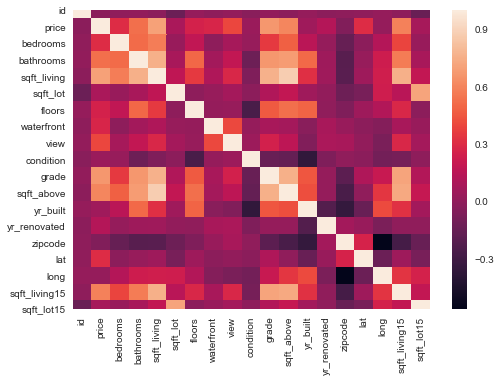

In [8]:
corr = data.corr()

sns.heatmap(corr)
plt.show()


In [9]:
data['date']= pd.to_datetime(data['date'])

In [10]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Dropping columns that showed little correllation and from the column descriptions only seemed moderately useful. Datesold might be useful in terms of sesason or important to adjust for if the time period in the data was a bit longer.

In [11]:
data = data.drop([ 'id', 'view', 'date'], axis = 1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 3.0+ MB


Waterfront needs some data added, but because this data seems categorical (either waterfront or not) I will assume that any missing data most likely was houses that were not on the waterfront.

In [13]:
data['waterfront'].describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [14]:
data['waterfront'] = data['waterfront'].fillna(0)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 3.0+ MB


In [16]:
data['sqft_basement'].head()

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: object

In [17]:
data.sqft_basement = data.sqft_basement.map(lambda x: float(x.replace('?', '0')))

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10)
memory usage: 3.0 MB


Checking for null values

In [20]:
data.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Only need to check into yr_renovated

In [21]:
data['yr_renovated'].head(15)

0        0.0
1     1991.0
2        NaN
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       NaN
13       0.0
14       0.0
Name: yr_renovated, dtype: float64

Looking for catagorical variables to one-hot encode:
Looks like, waterfront, condition, (likely grade), and zipcode (may be more usefull to categorize rather than just make 70 dummy variables). Though floors also has very few unique values I still think in general, that this will be a linear feature. After identifying categorical variables the next step is to one-hot encode and make sure to drop the first column from each feature to prevent multicolinearity.

Taking categorical variables and changing them to category type before one-hot encoding.

In [22]:
cat_feats = ['condition', 'grade', 'zipcode']
cat_feats_df = data[cat_feats]
cat_feats_df = cat_feats_df.astype('category')
cat_feats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 3 columns):
condition    21597 non-null category
grade        21597 non-null category
zipcode      21597 non-null category
dtypes: category(3)
memory usage: 67.0 KB


Now creating dummy variables and dropping the first column to ensure no dummy variable trap.

In [23]:
cat_feats_df = pd.get_dummies(cat_feats_df, drop_first=True)
cat_feats_df.head()

,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data = data.drop(['condition', 'grade', 'zipcode'], axis=1)
data= pd.concat([data, cat_feats_df], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,5650,1.0,0.0,1180,0.0,1955,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,2170,400.0,1951,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,770,0.0,1933,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,1050,910.0,1965,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,1680,0.0,1987,...,0,0,0,0,0,0,0,0,0,0


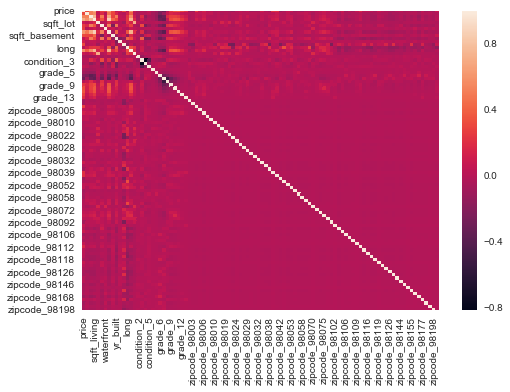

In [25]:
corr = data.corr()

sns.heatmap(corr)
plt.show()

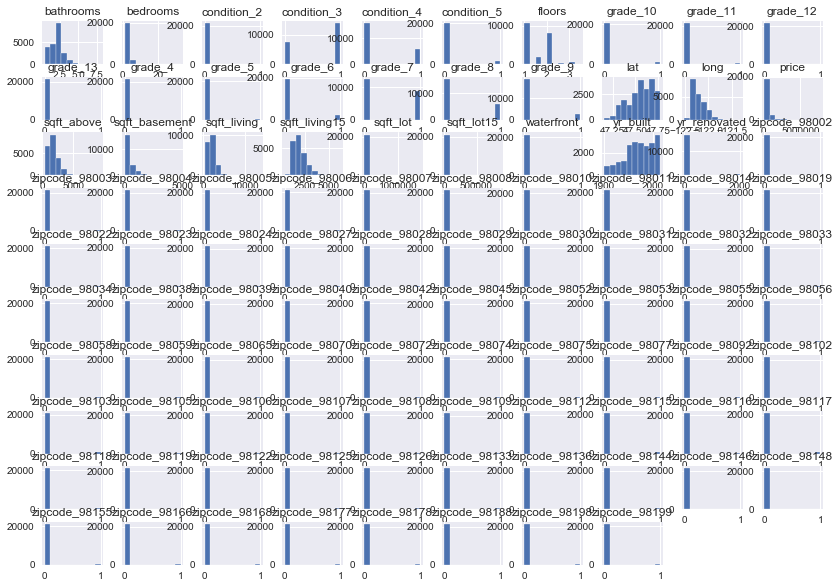

In [26]:
data.hist(figsize = (14,10))
plt.show()


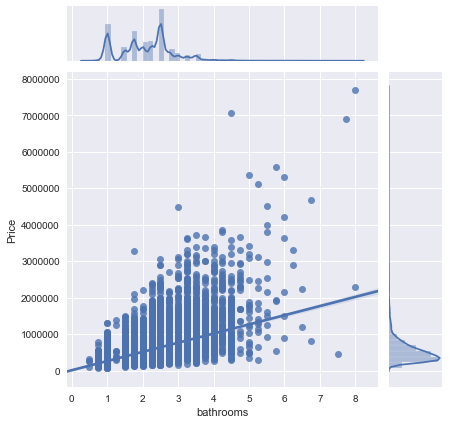

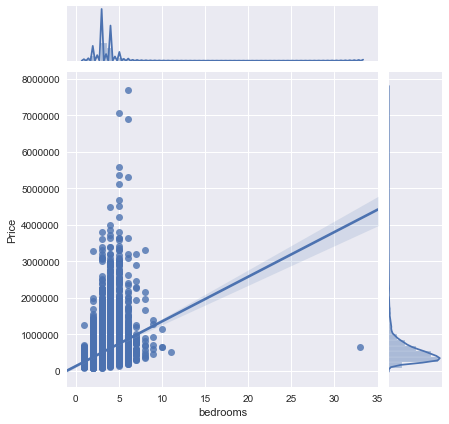

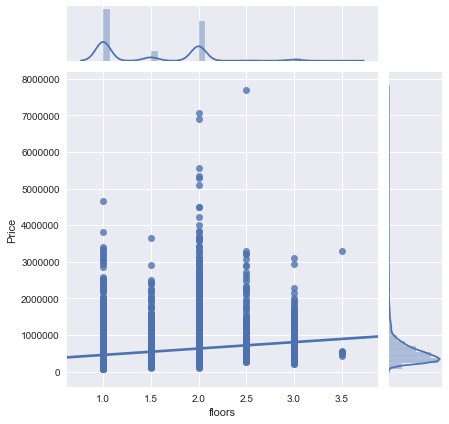

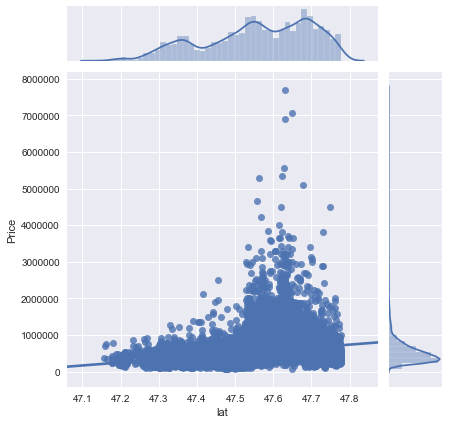

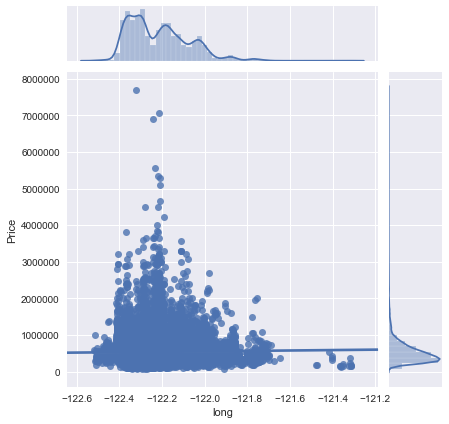

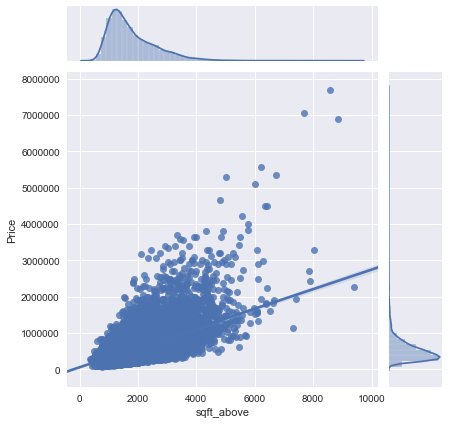

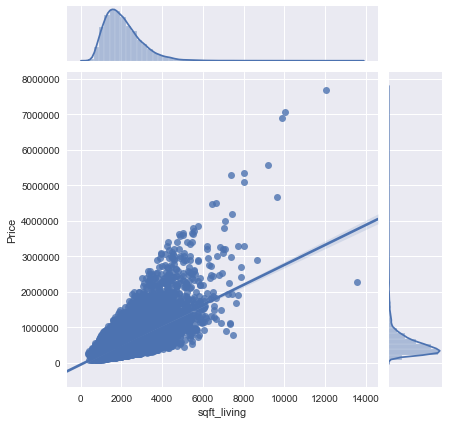

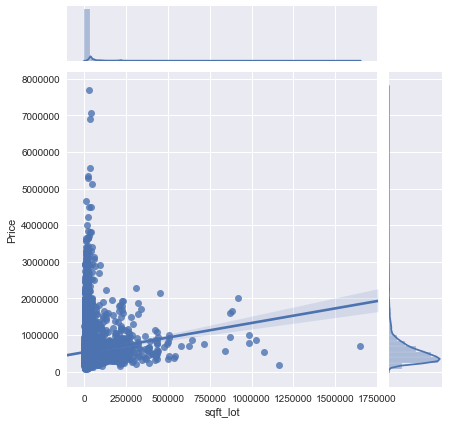

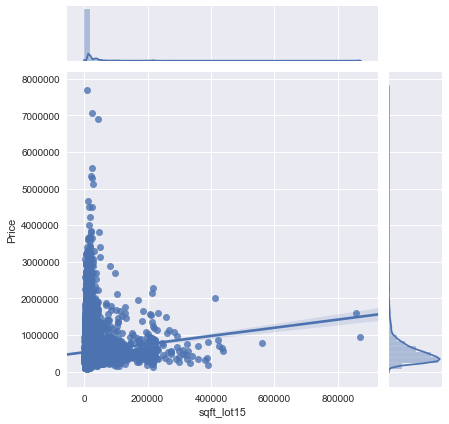

In [27]:
relcols = ['bathrooms', 'bedrooms', 'floors', 'lat', 'long', 'sqft_above', 'sqft_living',
          'sqft_lot', 'sqft_lot15']

for col in relcols:
    sns.jointplot(x = data[col], y = data['price'], data = data, kind = 'reg')
    plt.ylabel('Price')
    plt.show()
#investigating linearity of data


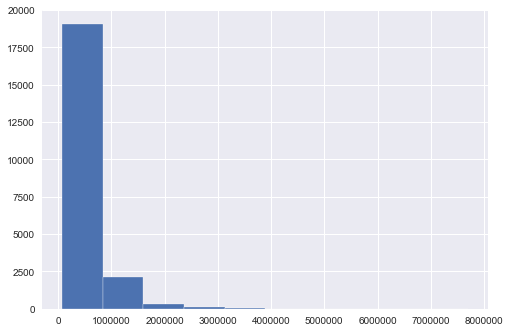

In [28]:
#checking into target variable

data['price'].hist()
plt.show()

In [29]:
outcome = 'price'
x_cols = list(data.columns)
x_cols.remove(outcome)

In [30]:
train, test = train_test_split(data)

In [31]:
print(len(train), len(test))
train.head()

16197 5400


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
11494,815000.0,3,2.00,2270,11989,1.0,0.0,2270,0.0,1968,...,0,0,0,0,0,0,0,0,0,0
20539,379500.0,4,2.50,2560,5102,2.0,0.0,2560,0.0,2013,...,0,0,0,0,0,0,0,0,0,0
6167,197000.0,3,1.00,1090,17630,1.0,0.0,1090,0.0,1962,...,0,0,0,0,0,0,0,0,0,0
16678,540000.0,3,2.25,1670,3135,2.0,0.0,1220,450.0,2002,...,0,0,0,0,0,0,0,0,0,1
8542,570000.0,4,2.50,2430,44001,1.0,0.0,2430,0.0,1994,...,0,0,0,0,0,0,0,0,0,0


In [32]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     651.5
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        12:50:52   Log-Likelihood:            -1.7785e+05
No. Observations:               13307   AIC:                         3.559e+05
Df Residuals:                   13209   BIC:                         3.566e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.573e+07   7.53e+06     -4.748      0.000   -5.05e+07    -2.1e+07
bedrooms      -1.505e+04   1866.089     -8.066      0.000   -1.87e+04   -1.14e+04
bathrooms      2.954e+04   3242.494      9.110      0.000    2.32e+04    3.59e+04
sqft_living     123.4572     17.300      7.136      0.000      89.547     157.367
sqft_lot          0.2291      0.051      4.487      0.000       0.129       0.329
floors        -2.753e+04   3932.256     -7.000      0.000   -3.52e+04   -1.98e+04
waterfront     8.085e+05   1.65e+04     49.019      0.000    7.76e+05    8.41e+05
sqft_above       40.3763     17.316      2.332      0.020       6.435      74.317
sqft_basement     2.2641     17.095      0.132      0.895     -31.244      35.772
yr_built       -387.9819     82.106     -4.725      0.000    -548.922    -227.042
yr_renovated     31.0656      3.668      8.468      0.000      23.875      38.256
lat            1.903e+05   7.77e+04      2.451      0.014    3.81e+04    3.43e+05
long           -2.25e+05   5.59e+04     -4.024      0.000   -3.35e+05   -1.15e+05
sqft_living15    28.6497      3.554      8.061      0.000      21.683      35.617
sqft_lot15       -0.0799      0.074     -1.082      0.279      -0.225       0.065
condition_2    2.386e+04   4.18e+04      0.571      0.568    -5.8e+04    1.06e+05
condition_3    4.445e+04   3.92e+04      1.133      0.257   -3.24e+04    1.21e+05
condition_4    7.546e+04   3.92e+04      1.923      0.054   -1440.019    1.52e+05
condition_5    1.187e+05   3.95e+04      3.008      0.003    4.14e+04    1.96e+05
grade_4       -9.805e+04   1.62e+05     -0.604      0.546   -4.16e+05     2.2e+05
grade_5        -1.34e+05   1.56e+05     -0.859      0.390    -4.4e+05    1.72e+05
grade_6       -1.338e+05   1.56e+05     -0.860      0.390   -4.39e+05    1.71e+05
grade_7       -1.313e+05   1.56e+05     -0.844      0.399   -4.36e+05    1.74e+05
grade_8       -1.033e+05   1.56e+05     -0.664      0.507   -4.08e+05    2.02e+05
grade_9       -2.436e+04   1.56e+05     -0.156      0.876    -3.3e+05    2.81e+05
grade_10       1.123e+05   1.56e+05      0.721      0.471   -1.93e+05    4.18e+05
grade_11       2.879e+05   1.56e+05      1.843      0.065   -1.83e+04    5.94e+05
grade_12       7.138e+05   1.58e+05      4.527      0.000    4.05e+05    1.02e+06
grade_13        1.89e+06   1.64e+05     11.516      0.000    1.57e+06    2.21e+06
zipcode_98002  1.836e+04   1.77e+04      1.036      0.300   -1.64e+04    5.31e+04
zipcode_98003 -1.607e+04   1.58e+04     -1.017      0.309   -4.71e+04    1.49e+04
zipcode_98004  6.737e+05   2.88e+04     23.391      0.000    6.17e+05     7.3e+05
zipcode_98005  2.531e+05    3.1e+04      8.155      0.000    1.92e+05    3.14e+05
zipcode_98006   2.19e+05   2.53e+04      8.647      0.000    1.69e+05    2.69e+05
zipcode_98007  2.145e+05   3.18e+04      6.748   

In [42]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

98 64
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-3.573e+07,7.53e+06,-4.748,0.0,-5.05e+07,-2.1e+07
bedrooms,-1.505e+04,1866.089,-8.066,0.0,-1.87e+04,-1.14e+04
bathrooms,2.954e+04,3242.494,9.110,0.0,2.32e+04,3.59e+04
sqft_living,123.4572,17.300,7.136,0.0,89.547,157.367
sqft_lot,0.2291,0.051,4.487,0.0,0.129,0.329


In [40]:
x_cols

['Intercept',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'sqft_above',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'condition_5',
 'grade_12',
 'grade_13',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98014',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98029',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98056',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98112',
 'zipcode_98115',
 'zipcode_98116',
 'zipcode_98117',
 'zipcode_98118',
 'zipcode_98119',
 'zipcode_98122',
 'zipcode_98125',
 'zipcode_98126',
 'zipcod

In [43]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     867.9
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:05:03   Log-Likelihood:            -1.7857e+05
No. Observations:               13307   AIC:                         3.573e+05
Df Residuals:                   13242   BIC:                         3.577e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.176e+07   3.41e+06    -12.259      0.000   -4.84e+07   -3.51e+07
bedrooms      -2.811e+04   1919.529    -14.646      0.000   -3.19e+04   -2.44e+04
bathrooms      3.086e+04   3392.558      9.095      0.000    2.42e+04    3.75e+04
sqft_living     150.1357      4.445     33.778      0.000     141.423     158.848
sqft_lot          0.2247      0.040      5.648      0.000       0.147       0.303
floors        -3.376e+04   4079.165     -8.276      0.000   -4.18e+04   -2.58e+04
waterfront       8.3e+05   1.73e+04     47.948      0.000    7.96e+05    8.64e+05
sqft_above       74.7634      4.529     16.506      0.000      65.885      83.642
yr_built       -331.0380     77.851     -4.252      0.000    -483.637    -178.439
yr_renovated     24.6000      3.794      6.484      0.000      17.163      32.037
lat            3.248e+05   1.54e+04     21.087      0.000    2.95e+05    3.55e+05
long            -2.2e+05   2.75e+04     -7.988      0.000   -2.74e+05   -1.66e+05
sqft_living15    53.6451      3.537     15.167      0.000      46.712      60.578
condition_5    5.891e+04   5562.027     10.592      0.000     4.8e+04    6.98e+04
grade_12       5.494e+05   2.35e+04     23.330      0.000    5.03e+05    5.96e+05
grade_13       1.655e+06    5.3e+04     31.234      0.000    1.55e+06    1.76e+06
zipcode_98004  6.719e+05    1.2e+04     56.141      0.000    6.48e+05    6.95e+05
zipcode_98005  2.362e+05    1.7e+04     13.925      0.000    2.03e+05    2.69e+05
zipcode_98006  2.225e+05   1.02e+04     21.724      0.000    2.02e+05    2.43e+05
zipcode_98007  2.025e+05    1.8e+04     11.278      0.000    1.67e+05    2.38e+05
zipcode_98008  2.026e+05   1.33e+04     15.214      0.000    1.77e+05    2.29e+05
zipcode_98010  9.315e+04   2.29e+04      4.067      0.000    4.83e+04    1.38e+05
zipcode_98014  6.307e+04   2.17e+04      2.905      0.004    2.05e+04    1.06e+05
zipcode_98022  9.862e+04   1.61e+04      6.113      0.000     6.7e+04     1.3e+05
zipcode_98023 -4.036e+04   1.08e+04     -3.724      0.000   -6.16e+04   -1.91e+04
zipcode_98024  1.398e+05   2.58e+04      5.419      0.000    8.93e+04     1.9e+05
zipcode_98027  1.455e+05   1.16e+04     12.589      0.000    1.23e+05    1.68e+05
zipcode_98029  1.916e+05   1.33e+04     14.447      0.000    1.66e+05    2.18e+05
zipcode_98033  2.733e+05   1.07e+04     25.589      0.000    2.52e+05    2.94e+05
zipcode_98034  9.403e+04   9931.955      9.468      0.000    7.46e+04    1.13e+05
zipcode_98038  4.204e+04   1.05e+04      4.021      0.000    2.15e+04    6.25e+04
zipcode_98039  1.148e+06    2.9e+04     39.621      0.000    1.09e+06     1.2e+06
zipcode_98040  4.843e+05   1.26e+04     38.505      0.000     4.6e+05    5.09e+05
zipcode_98045   1.51e+05   1.88e+04      8.042      0.000    1.14e+05    1.88e+05
zipcode_98052  1.466e+05   1.01e+04     14.522   

In [46]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table

65 64
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-4.176e+07,3.41e+06,-12.259,0.000,-4.84e+07,-3.51e+07
bedrooms,-2.811e+04,1919.529,-14.646,0.000,-3.19e+04,-2.44e+04
bathrooms,3.086e+04,3392.558,9.095,0.000,2.42e+04,3.75e+04
sqft_living,150.1357,4.445,33.778,0.000,141.423,158.848
sqft_lot,0.2247,0.040,5.648,0.000,0.147,0.303
...,...,...,...,...,...,...
zipcode_98144,2.182e+05,1.14e+04,19.171,0.000,1.96e+05,2.41e+05
zipcode_98146,3.813e+04,1.32e+04,2.885,0.004,1.22e+04,6.4e+04
zipcode_98166,3.573e+04,1.36e+04,2.631,0.009,9114.924,6.23e+04


In [45]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     867.9
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:06:47   Log-Likelihood:            -1.7857e+05
No. Observations:               13307   AIC:                         3.573e+05
Df Residuals:                   13242   BIC:                         3.577e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.176e+07   3.41e+06    -12.259      0.000   -4.84e+07   -3.51e+07
bedrooms      -2.811e+04   1919.529    -14.646      0.000   -3.19e+04   -2.44e+04
bathrooms      3.086e+04   3392.558      9.095      0.000    2.42e+04    3.75e+04
sqft_living     150.1357      4.445     33.778      0.000     141.423     158.848
sqft_lot          0.2247      0.040      5.648      0.000       0.147       0.303
floors        -3.376e+04   4079.165     -8.276      0.000   -4.18e+04   -2.58e+04
waterfront       8.3e+05   1.73e+04     47.948      0.000    7.96e+05    8.64e+05
sqft_above       74.7634      4.529     16.506      0.000      65.885      83.642
yr_built       -331.0380     77.851     -4.252      0.000    -483.637    -178.439
yr_renovated     24.6000      3.794      6.484      0.000      17.163      32.037
lat            3.248e+05   1.54e+04     21.087      0.000    2.95e+05    3.55e+05
long            -2.2e+05   2.75e+04     -7.988      0.000   -2.74e+05   -1.66e+05
sqft_living15    53.6451      3.537     15.167      0.000      46.712      60.578
condition_5    5.891e+04   5562.027     10.592      0.000     4.8e+04    6.98e+04
grade_12       5.494e+05   2.35e+04     23.330      0.000    5.03e+05    5.96e+05
grade_13       1.655e+06    5.3e+04     31.234      0.000    1.55e+06    1.76e+06
zipcode_98004  6.719e+05    1.2e+04     56.141      0.000    6.48e+05    6.95e+05
zipcode_98005  2.362e+05    1.7e+04     13.925      0.000    2.03e+05    2.69e+05
zipcode_98006  2.225e+05   1.02e+04     21.724      0.000    2.02e+05    2.43e+05
zipcode_98007  2.025e+05    1.8e+04     11.278      0.000    1.67e+05    2.38e+05
zipcode_98008  2.026e+05   1.33e+04     15.214      0.000    1.77e+05    2.29e+05
zipcode_98010  9.315e+04   2.29e+04      4.067      0.000    4.83e+04    1.38e+05
zipcode_98014  6.307e+04   2.17e+04      2.905      0.004    2.05e+04    1.06e+05
zipcode_98022  9.862e+04   1.61e+04      6.113      0.000     6.7e+04     1.3e+05
zipcode_98023 -4.036e+04   1.08e+04     -3.724      0.000   -6.16e+04   -1.91e+04
zipcode_98024  1.398e+05   2.58e+04      5.419      0.000    8.93e+04     1.9e+05
zipcode_98027  1.455e+05   1.16e+04     12.589      0.000    1.23e+05    1.68e+05
zipcode_98029  1.916e+05   1.33e+04     14.447      0.000    1.66e+05    2.18e+05
zipcode_98033  2.733e+05   1.07e+04     25.589      0.000    2.52e+05    2.94e+05
zipcode_98034  9.403e+04   9931.955      9.468      0.000    7.46e+04    1.13e+05
zipcode_98038  4.204e+04   1.05e+04      4.021      0.000    2.15e+04    6.25e+04
zipcode_98039  1.148e+06    2.9e+04     39.621      0.000    1.09e+06     1.2e+06
zipcode_98040  4.843e+05   1.26e+04     38.505      0.000     4.6e+05    5.09e+05
zipcode_98045   1.51e+05   1.88e+04      8.042      0.000    1.14e+05    1.88e+05
zipcode_98052  1.466e+05   1.01e+04     14.522   

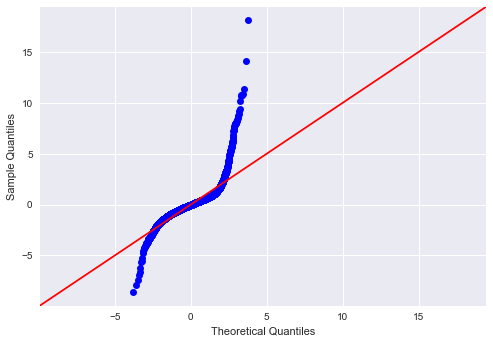

In [47]:
model_resid = model.resid

fig = sm.graphics.qqplot(model_resid, dist=stats.norm, line='45', fit=True)


In [ ]:
cyl_dummies = pd.get_dummies(data['cylinders'], prefix='cyl', drop_first=True)
yr_dummies = pd.get_dummies(data['model year'], prefix='yr', drop_first=True)
orig_dummies = pd.get_dummies(data['origin'], prefix='orig', drop_first=True)